In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
import sys
root = "/project/wyin/jlee/ml-project/"
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
from utilities import ScaledData, UnscaledData, baseline_errors, find_knn, see_results, order_validation, get_model
import torch
data_loc = os.path.join(root, "inverse-shifted/data")

In [2]:
data = UnscaledData(data_loc, X_name = "dos", y_name = "params")
errors = baseline_errors(data_loc, y_name = "params")
print(f"mean: {errors[0]}, std: {errors[1]}")

mean: 0.032042989502234574, std: 0.018724417443666846


trying n neights = 1
trying n neights = 2
trying n neights = 3
trying n neights = 4
trying n neights = 5
trying n neights = 6
trying n neights = 7
trying n neights = 8
trying n neights = 9
trying n neights = 10
trying n neights = 11
trying n neights = 12
trying n neights = 13
trying n neights = 14
trying n neights = 15
trying n neights = 16
trying n neights = 17
trying n neights = 18
trying n neights = 19
6.643613707165108e-05
4


KNeighborsRegressor(n_neighbors=4)

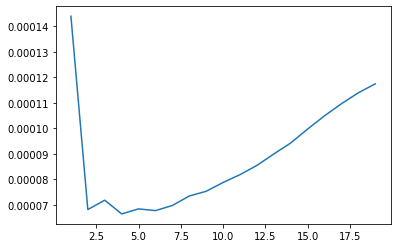

In [3]:
#Uniform knn
find_knn(data_loc, X_name = "dos", y_name = "params", scaled = False)

trying n neights = 1
trying n neights = 2
trying n neights = 3
trying n neights = 4
trying n neights = 5
trying n neights = 6
trying n neights = 7
trying n neights = 8
trying n neights = 9
trying n neights = 10
trying n neights = 11
trying n neights = 12
trying n neights = 13
trying n neights = 14
trying n neights = 15
trying n neights = 16
trying n neights = 17
trying n neights = 18
trying n neights = 19
4.070966471825616e-05
9


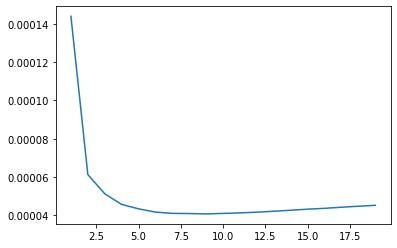

In [5]:
#Weighted knn
def get_weights(distances):
    return distances ** -3

best_model = find_knn(data_loc, X_name = "dos", y_name = "params", weight_func = get_weights, scaled = False)

model mse: 4.194476108913502e-05
(0.00011302884976809247, array([-0.48164155,  0.02116481,  0.23116502]), array([-0.5  ,  0.02 ,  0.232]))


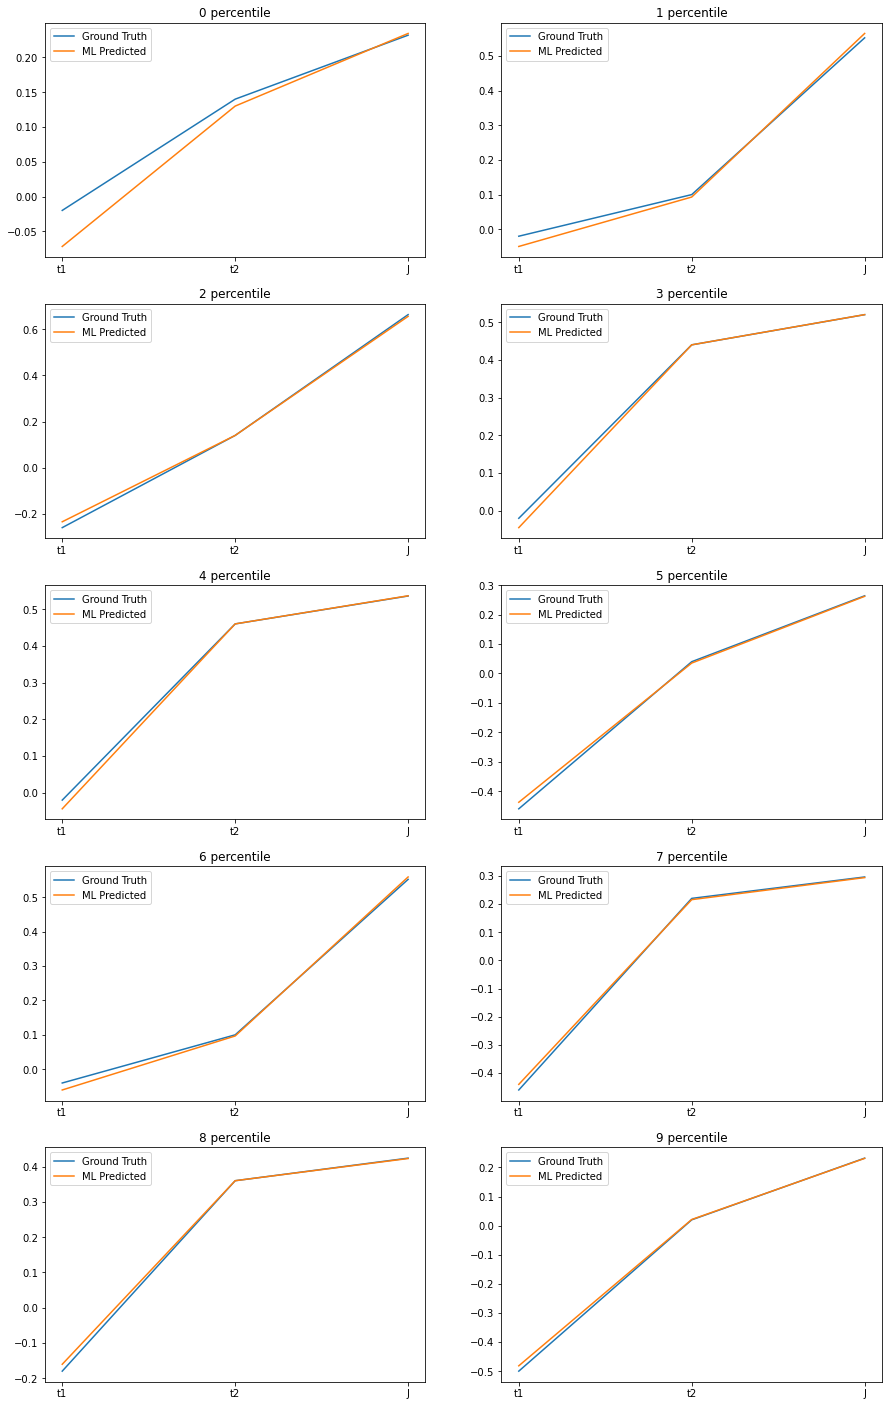

In [13]:
predicted = best_model.predict(data.test_X)
results = see_results(predicted, data.test_y, grid_shape = (5, 2), percentiles = np.arange(0, 10, 1),
            x_vals = [1, 2, 3], tick_labels = ['t1', 't2', 'j'])

print(results[9])

In [2]:

val_ends = os.path.join(root, "Tests/utilities-testing/val-ends/arch-search-15-min")
print(val_ends)
pairs = order_validation(val_ends)

/project/wyin/jlee/ml-project/Tests/utilities-testing/val-ends/arch-search-15-min


In [3]:
for pair in pairs:
    print(pair)

(5.450240223581204e-07, '[354, 256, 256, 256, 256, 3],0.001,128,0.5')
(6.604552140743181e-07, '[354, 256, 192, 128, 64, 3],0.001,128,0.5')
(6.818813176323602e-07, '[354, 256, 256, 256, 3],0.001,128,0.5')
(7.299843787222926e-07, '[354, 256, 128, 64, 32, 16, 3],0.001,128,0.5')
(7.428218395943986e-07, '[354, 256, 128, 64, 32, 3],0.001,128,0.5')
(7.428731692016299e-07, '[354, 255, 204, 153, 102, 51, 3],0.001,128,0.5')
(7.681230158596009e-07, '[354, 128, 128, 128, 128, 3],0.001,128,0.5')
(7.733339657534088e-07, '[354, 252, 210, 168, 126, 84, 42, 3],0.001,128,0.5')
(8.35750938676938e-07, '[354, 255, 170, 85, 3],0.001,128,0.5')
(1.05658398297237e-06, '[354, 128, 96, 64, 32, 3],0.001,128,0.5')
(1.4285690213000635e-06, '[354, 128, 128, 128, 3],0.001,128,0.5')
(0.013843105174601078, '[354, 256, 128, 64, 32, 16, 8, 3],0.001,128,0.5')


In [4]:
arch_path = os.path.join(root, "Tests/utilities-testing/logs/arch-search-15-min")
model_path = os.path.join(arch_path, '[354, 256, 192, 128, 64, 3],0.001,128,0.5')
best_model = get_model(model_path)

print(best_model)

LitNeuralNet(
  (forward_prop): Sequential(
    (0): Linear(in_features=354, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=192, bias=True)
    (3): ReLU()
    (4): Linear(in_features=192, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=3, bias=True)
  )
)


In [5]:
data = ScaledData(data_loc, X_name = "dos", y_name = "params")
test_X_tensor = torch.from_numpy(data.test_X).float()

predicted = best_model(test_X_tensor).detach().numpy()

model mse: 6.83384810291873e-07


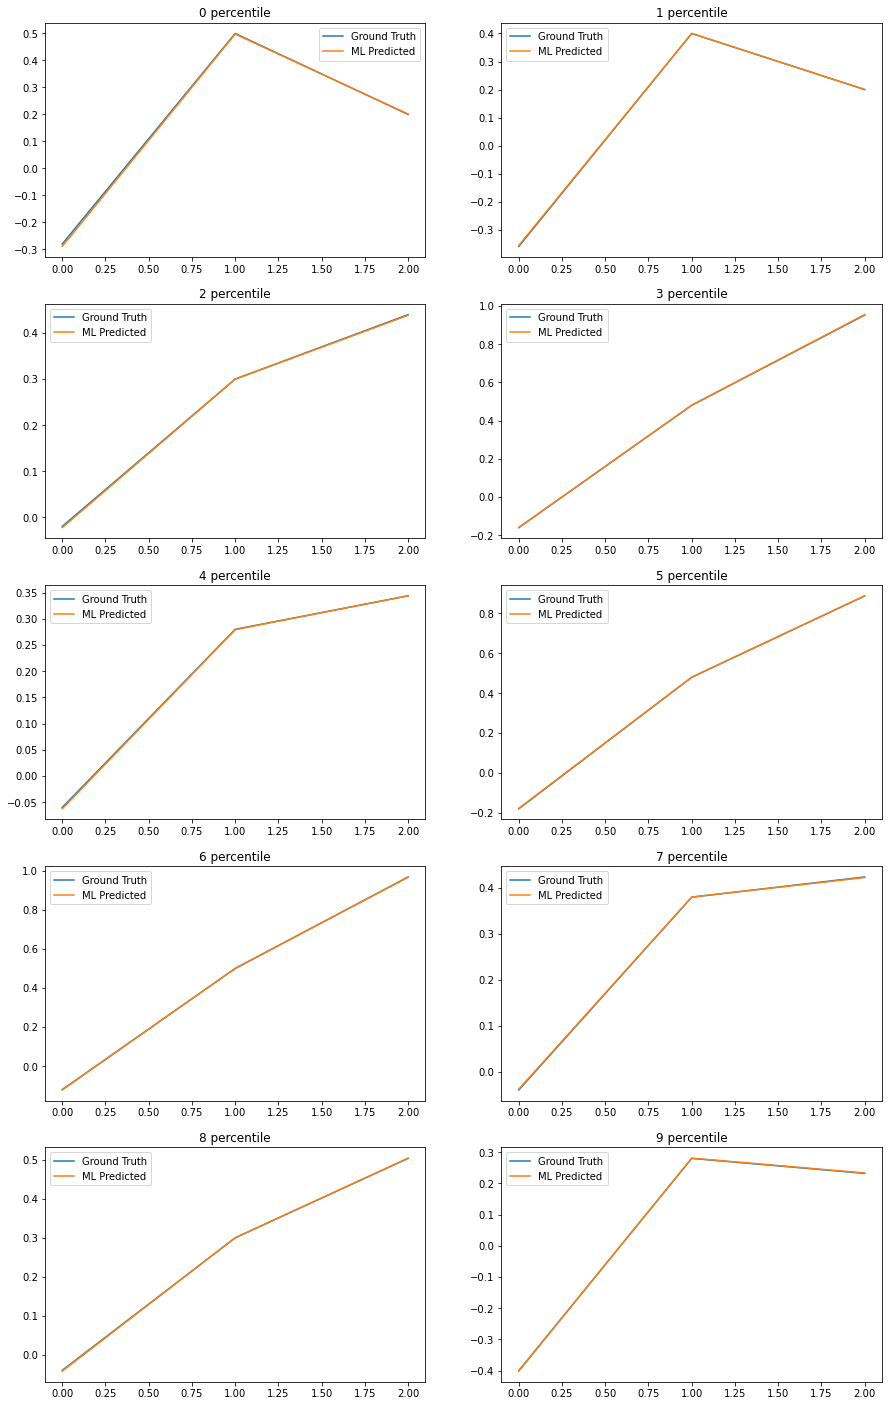

In [7]:
results = see_results(predicted, data.test_y, (5, 2), np.arange(10), [0, 1, 2])

In [8]:
for result in results:
    print(result)

(2.9595790464555635e-05, array([-0.28901562,  0.49764737,  0.20140396], dtype=float32), array([-0.28,  0.5 ,  0.2 ]))
(4.620924413183486e-06, array([-0.35627908,  0.4001219 ,  0.20005131], dtype=float32), array([-0.36,  0.4 ,  0.2 ]))
(3.241374150827406e-06, array([-0.02273294,  0.29969937,  0.4385287 ], dtype=float32), array([-0.02,  0.3 ,  0.44]))
(2.679527245002565e-06, array([-0.15920137,  0.48089007,  0.9545707 ], dtype=float32), array([-0.16 ,  0.48 ,  0.952]))
(2.4288494433085934e-06, array([-0.06260546,  0.27929845,  0.34392264], dtype=float32), array([-0.06 ,  0.28 ,  0.344]))
(2.1629608163252755e-06, array([-0.17765772,  0.48055342,  0.8888345 ], dtype=float32), array([-0.18 ,  0.48 ,  0.888]))
(1.9662233788421526e-06, array([-0.12195028,  0.49959442,  0.96661055], dtype=float32), array([-0.12 ,  0.5  ,  0.968]))
(1.7381113353909068e-06, array([-0.03809208,  0.38019472,  0.42276055], dtype=float32), array([-0.04 ,  0.38 ,  0.424]))
(1.6260376593020652e-06, array([-0.04213074,